In [1]:
import collections
import networkx as nx
import sys
import os
sys.path.append(r'c:\\Users\\rotim\\OneDrive\\Documents\\Reading\\graph-code\\Skoltech-PhD-Thesis\\_codes\\SIR\\Influential-nodes-identification-in-complex-networks-via-information-entropy')
from algorithms import *
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import pickle

In [2]:
graph_collections, graph_name = read_graph("./test-graphs")


{'ABILENE': {'index': 0, 'nodes': 11, 'edges': 14}, 'ABVT': {'index': 1, 'nodes': 23, 'edges': 31}, 'AGIS': {'index': 2, 'nodes': 25, 'edges': 30}, 'ARN.GRAPHML': {'index': 3, 'nodes': 30, 'edges': 29}, 'BELLCANADA': {'index': 4, 'nodes': 48, 'edges': 64}, 'BELLSOUTH.GRAPHML': {'index': 5, 'nodes': 51, 'edges': 66}, 'BICS.GRAPHML': {'index': 6, 'nodes': 33, 'edges': 48}, 'CERNET.GRAPHML': {'index': 7, 'nodes': 41, 'edges': 58}, 'CESNET200706.GRAPHML': {'index': 8, 'nodes': 44, 'edges': 51}, 'CHINANET.GRAPHML': {'index': 9, 'nodes': 42, 'edges': 66}, 'COGENTCO.GRAPHML': {'index': 10, 'nodes': 197, 'edges': 243}, 'COLT.GRAPHML': {'index': 11, 'nodes': 153, 'edges': 177}, 'DELTACOM.GRAPHML': {'index': 12, 'nodes': 113, 'edges': 161}, 'GARR201110.GRAPHML': {'index': 13, 'nodes': 59, 'edges': 74}, 'GEANT2001': {'index': 14, 'nodes': 27, 'edges': 38}, 'GRNET.GRAPHML': {'index': 15, 'nodes': 37, 'edges': 42}, 'INTELLIFIBER.GRAPHML': {'index': 16, 'nodes': 73, 'edges': 95}, 'INTEROUTE.GRAPHML'

In [3]:
# India   145nodes 187edges #37
# US carrier 158nodes   189edges # 41
# Kentucky    754nodes   895edges # 20
# Albeni  # 0
# Geant  2001 #14
# Bell Canada # 4
# Abvt # 1
# Agis # 2
# 10, 18, 8
# selection__= []
# selection__=[i for i,j in enumerate(graph_name)]
def selection__from_graph(graph_coll,graph_name_list,sel_=[]):
    """_summary_

    Args:
        graph_coll (_type_): _description_
        sel_ (list, optional): _description_. Defaults to [].

    Returns:
        _type_: _description_
    """
    if sel_ !=[]:
        return [(j, graph_coll[k]) for i, j in enumerate(graph_name_list)
                for k in sel_ if i == k]
    else:
        return [(i, j) for i, j in zip(graph_name_list, graph_coll)]


In [4]:
G = graph_collections[1]
# geo_loc_data = get_geo_data("Internet2LatLong.csv")
geo_loc_data = {k: {"lat": v.get('Latitude', 0), "long": v.get('Longitude', 0)}
                for (k, v) in G.nodes(data=True)}
# print(geo_loc_data)
edge_geo_data_combined = assign_location(G, geo_loc_data)
# set edge attributes
set_edge_attr(G, edge_geo_data_combined)
# G.edges(data=True)


In [5]:
selection__= [37,41,20,0,14,4,1,2,10, 18, 8]

gGrahps = selection__from_graph(graph_collections, graph_name)  # , selection__

# print(gGrahps)

geo_loc_data_sample = {i: {k: {"lat": v.get('Latitude', 0), "long": v.get('Longitude', 0)}
     for (k, v) in g.nodes(data=True)} for i, g in gGrahps}
# print(geo_loc_data_sample)

edge_geo_data_sample = {k: assign_location(u, v) for (k, v), (j,u) in zip(geo_loc_data_sample.items(), gGrahps)}
# print(geo_loc_data_sample)
nx.get_edge_attributes(gGrahps[4][1], 'weight')


{}

In [6]:
node_strength_2_deg = [(i, sum(hub_information(G, i, 2))) 
                       for (i, j) in sorted(list(G.degree()), key=lambda item: int(item[0]))]
degree__ = [(i, len(n_neighbor(G, i, 1))) for (i, j) in sorted(list(G.degree()),
                                                               key=lambda item: int(item[0]))]


In [7]:

source_1, source_2, source_3, source_4, *others = degree__, node_strength_2_deg, eccentricity(G),  approximate_current_flow_betweenness_centrality(G, weight="weight"), current_flow_betweenness_centrality(G), betweenness_centrality(G, weight="weight"),  closeness_centrality(G),      load_centrality(
    G),    #eigenvector_centrality(G),

# print(source_2, source_3)


In [8]:
sources_of_evidences = {
    "Degree": {g[0]: [(i, len(n_neighbor(g[1], i, 1))) for (i, j) in sorted(list(g[1].degree()), key=lambda item: int(item[0]))] for g in gGrahps},
    "Node Strength": {g[0]: [(i, sum(hub_information(g[1], i, 2))) for (i, j) in sorted(list(g[1].degree()), key=lambda item: int(item[0]))] for g in gGrahps},
    "Eccentricity": {g[0]: eccentricity(g[1]) for g in gGrahps},
    "Approx Curr. Flow Betwns Cent'y": {g[0]: approximate_current_flow_betweenness_centrality(g[1]) for g in gGrahps}
}
# sources_of_evidences["Degree"]["ABILENE"]

In [9]:
e_v = 2
varying_examples_multi(source_1, source_2, source_3, source_4,e_v)

[('11', 0.9991533889283354),
 ('1', 0.8102800440940692),
 ('10', 0.43433003311276563),
 ('5', 0.3281087394193372)]

In [10]:
evis = [2,3,4]
selected_nodes_based_on_source ={i:{e: varying_examples_multi(sources_of_evidences["Degree"][i],
sources_of_evidences["Node Strength"][i], 
sources_of_evidences["Eccentricity"][i], 
    sources_of_evidences["Approx Curr. Flow Betwns Cent'y"][i], e) for e in evis} for i, j in gGrahps}

selected_nodes_based_on_source_ext = {k2:{k:len(v) for k,v in v2.items()} for k2,v2 in selected_nodes_based_on_source.items()}

# {i: { "#Nodes":  nx.number_of_nodes(j), "#Edges": nx.number_of_edges(j), "sel_":v} for (i,j), v in zip(gGrahps, selected_nodes_based_on_source.values())}
sel_node_summary={i: {"#Nodes":  nx.number_of_nodes(j), "#Edges": nx.number_of_edges(j), "Diameter":nx.diameter(j), "Density":nx.density(j)}for (i, j)in gGrahps }
sel_to_table = {
    i: (sel_node_summary[i] | selected_nodes_based_on_source_ext[i]) for i, j in gGrahps}
    


In [11]:
pd.DataFrame.from_dict(
    sel_to_table, orient='index')
# print()


,#Nodes,#Edges,Diameter,Density,2,3,4
ABILENE,11,14,5,0.254545,5,4,4
ABVT,23,31,7,0.122530,4,17,7
AGIS,25,30,7,0.100000,6,11,9
ARN.GRAPHML,30,29,4,0.066667,3,10,14
BELLCANADA,48,64,13,0.056738,11,16,18
BELLSOUTH.GRAPHML,51,66,7,0.051765,3,29,30
BICS.GRAPHML,33,48,8,0.090909,8,23,16
CERNET.GRAPHML,41,58,5,0.070732,4,21,14
CESNET200706.GRAPHML,44,51,6,0.053911,4,17,27
CHINANET.GRAPHML,42,66,4,0.076655,8,10,33


In [47]:
clusters__ = {
    k2: {
        k: cluster_optimal_nodes_test(j, v) for k, v in v2.items()
        }  
        for (i, j), (k2, v2) in zip(
            tqdm(gGrahps), 
            selected_nodes_based_on_source.items()
        ) 
}


100%|██████████| 43/43 [00:07<00:00,  5.66it/s]


In [13]:
[{x:cluster_optimal_nodes_test(
    gGrahps[0][1], selected_nodes_based_on_source["ABILENE"][x])}for x in [2, 3, 4]]


[{2: {'8': {'5', '7'}, '9': {'0', '2'}, '10': {'1'}, '6': {'3', '4'}}},
 {3: {'7': {'10', '5', '8'}, '1': {'0'}, '2': {'9'}, '6': {'3', '4'}}},
 {4: {'7': {'1', '10', '3', '6', '8'}, '2': {'0', '9'}, '5': {'4'}}}]

In [49]:

clusters__dict = { c: {e: {i: set([i]) | j for i, j in f.items()} for e, f in d.items()} for c, d in clusters__.items()}
# print(clusters__dict)
clusters__pair ={x: {e: {u: k for (k, v) in f.items() for u in v} for e, f in y.items()} for x, y in clusters__dict.items()}
# clusters__pair
# https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.set_node_attributes.html



In [15]:
G = graph_collections[1]
__rand = nx.number_of_nodes(G)


In [16]:
nx.number_of_nodes(G)

23

In [17]:
clusters__pair_small = {'ABILENE': {
    2: {'7': '8', '8': '8', '5': '8', '0': '9', '9': '9', '2': '9', '1': '10', '10': '10', '6': '6', '3': '6', '4': '6'}, 
    3: {'7': '7', '8': '7', '5': '7', '10': '7','1': '1', '0': '1', '9': '2', '2': '2', '6': '6', '3': '6', '4': '6'}, 
    4: {'3': '7', '10': '7', '1': '7', '7': '7', '8': '7', '6': '7', '0': '2', '9': '2', '2': '2', '4': '5', '5': '5'}
                }
            }


In [74]:
def plot_optimal_cluster(graph_clusters,g, title, evi):
    len_renadom = len(graph_clusters)
    random_colors = color_generator(len_renadom)
    values = [random_colors.get(v, "#000000") for k, v in graph_clusters.items()]
    # TODO: Set appropriate controllers values for nodes
    node_label = {k: f"C:{v['id']}" if k in set(graph_clusters.values( )) else str(v['id']) for k, v in g.nodes(data=True)}
    # {k: f'C:{v}' if k in set(v) else v for k, v in graph_clusters.items()}

    pos = nx.spring_layout(g)
    print(node_label)
    nx.draw(g, cmap=plt.get_cmap('viridis'),pos=pos, node_color=values, with_labels=True, font_color="white")
    # nx.draw(g, cmap=plt.get_cmap('viridis'),pos=pos, node_color=values)
    # nx.draw_networkx_labels(g, pos=pos,  labels=node_label,  font_color='white')
    title = title.split(".")[0]
    plt.suptitle(f"Graph: {title} \n Sources of Evidences: {evi}", fontsize=12, y=0.95) # f"{title}_{evi}"
    # dirpath = Path(f"{Path().absolute()}\images\{title}")
    # os.makedirs(dirpath, exist_ok=True) 
    # plt.savefig(Path(f"{dirpath}\{title.lower()}_{evi}.png"))  
    # plt.close()
    # return "Done"
    plt.show()

# [[plot_optimal_cluster(v2,g,k,k2) for k2, v2 in v.items()] for (n,g), (k,v) in zip(gGrahps,clusters__pair.items())]


In [65]:
print(set(clusters__pair_small['ABILENE'][2].values()))
{k:f"C:{v['id']}"  if k in set(clusters__pair_small['ABILENE'][2].values()) else str(v['id']) for k,v in gGrahps[0][1].nodes(data=True)}


{'6', '8', '9', '10'}


{'0': '0',
 '1': '1',
 '2': '2',
 '3': '3',
 '4': '4',
 '5': '5',
 '6': 'C:6',
 '7': '7',
 '8': 'C:8',
 '9': 'C:9',
 '10': 'C:10'}

In [54]:
# plot_optimal_cluster(clusters__pair_small['ABILENE'][2], gGrahps[0][1], 'ABILENE', 2)
print({clusters__pair_small['ABILENE'][2].values()})
tau = {v for  v in clusters__pair_small['ABILENE'][2].values()}
print(tau)
set(clusters__pair_small['ABILENE'][2].values())
{k:v for k,v in clusters__pair_small['ABILENE'][2].items() if k!=v}
# {'8': {'5', '7'}, '9': {'0', '2'}, '10': {'1'}, '6': {'3', '4'}}
{k: v for k, v in clusters__pair_small['ABILENE'][2].items() if k != v}


{dict_values(['8', '8', '8', '9', '9', '9', '10', '10', '6', '6', '6'])}
{'6', '8', '9', '10'}


{'7': '8', '5': '8', '0': '9', '2': '9', '1': '10', '3': '6', '4': '6'}

In [51]:
# G.nodes(data=True)
#  {k: f'C:{v}' if k in set(v) else v for k,v in clusters__pair_small['ABILENE'][2].items()}
node_label = {k: f'C:{v}' if v in set(v) else v for k,v in clusters__pair_small['ABILENE'][2].items()}
print(node_label)
# {v: f'C:{k}' if v in set(k) else k for k, v in clusters__pair_small['ABILENE'][2].items()}
print(clusters__pair_small['ABILENE'][2])
print({k:v for k,v in gGrahps[0][1].degree()})
# print(nx.get_node_attributes(gGrahps[0][1], 'id'))


{'7': 'C:8', '8': 'C:8', '5': 'C:8', '0': 'C:9', '9': 'C:9', '2': 'C:9', '1': '10', '10': '10', '6': 'C:6', '3': 'C:6', '4': 'C:6'}
{'7': '8', '8': '8', '5': '8', '0': '9', '9': '9', '2': '9', '1': '10', '10': '10', '6': '6', '3': '6', '4': '6'}
{'0': 2, '1': 2, '2': 2, '3': 2, '4': 3, '5': 2, '6': 3, '7': 3, '8': 3, '9': 3, '10': 3}


  0%|          | 0/43 [00:00<?, ?it/s]

{'0': '0', '1': '1', '2': '2', '3': '3', '4': '4', '5': '5', '6': 'C:6', '7': '7', '8': 'C:8', '9': 'C:9', '10': 'C:10'}


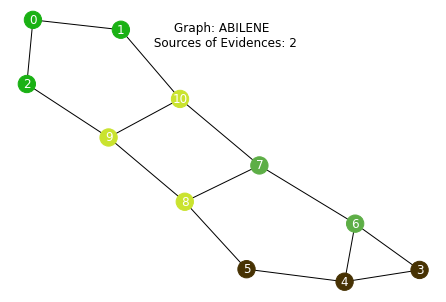

{'0': '0', '1': 'C:1', '2': 'C:2', '3': '3', '4': '4', '5': '5', '6': 'C:6', '7': 'C:7', '8': '8', '9': '9', '10': '10'}


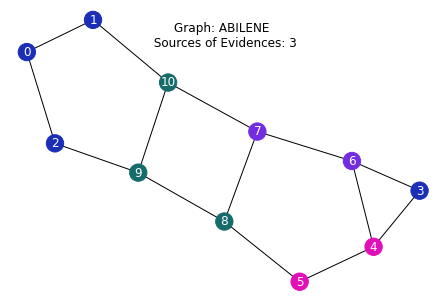

{'0': '0', '1': '1', '2': 'C:2', '3': '3', '4': '4', '5': 'C:5', '6': '6', '7': 'C:7', '8': '8', '9': '9', '10': '10'}


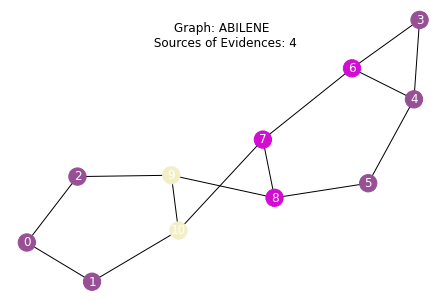

  2%|▏         | 1/43 [00:00<00:27,  1.50it/s]

In [75]:
[[plot_optimal_cluster(v2,g,k,k2) for k2, v2 in v.items()] for (n,g), (k,v) in zip(tqdm(gGrahps),clusters__pair_small.items())]
print()

In [22]:
# [(node, data) for node, data in G.nodes(data=True)]
node_strength_2_deg = [(i, sum(hub_information(G, i, 2)))
                       for (i, j) in sorted(list(G.degree()), key=lambda item: int(item[0]))]
degree__ = [(i, len(n_neighbor(G, i, 1))) for (i, j) in sorted(list(G.degree()),
                                                               key=lambda item: int(item[0]))]


In [23]:
cluster_optimal_nodes_test(
    gGrahps[1][1], selected_nodes_based_on_source["ABVT"][4])


{'11': {'13', '14', '15', '16', '17', '18', '19', '21', '22'},
 '1': {'4', '6', '8', '9'},
 '0': {'7'},
 '2': {'10', '20', '3'},
 '5': {'12'}}

In [24]:
G = gGrahps[1][1] #graph_collections[1]
sample__ = cluster_optimal_nodes_test(G, selected_nodes_based_on_source["ABVT"][4])
sample__

{'11': {'13', '14', '15', '16', '17', '18', '19', '21', '22'},
 '1': {'4', '6', '8', '9'},
 '0': {'7'},
 '2': {'10', '20', '3'},
 '5': {'12'}}

In [25]:
[(i, sum(hub_information(G, i, 1)))
 for (i, j) in sample__.items()]

average_case_c_s=[{source:(sum([nx.shortest_path_length(G, source, sub_target, weight='weight') for sub_target in target])/ (nx.number_of_nodes(G)-len(sample__)))} for source, target in sample__.items()]

worst_case_c_s=[{source: max([nx.shortest_path_length(G, source, sub_target, weight='weight') for sub_target in target]
               )} for source, target in sample__.items()]

# print([(s,x) for s,t in sample__.items() for x in t])
# print([[(s, x) for x in t]for s, t in sample__.items()])


In [26]:
average_c_c = {s: set(sample__.keys())-set([s]) for s, t in sample__.items()}
# sample__.keys()
len_k = len(average_c_c)
average_case_c_c=[{source: (2*sum([nx.shortest_path_length(G, source, sub_target, weight='weight')
                        for sub_target in target])/(len_k**2 - len_k))} for source, target in average_c_c.items()]

worst_case_c_c = [{source: max([nx.shortest_path_length(G, source, sub_target, weight='weight') for sub_target in target]
                               )} for source, target in average_c_c.items()]

worst_case_c_c

[{'11': 133.00400000000002},
 {'1': 88.182},
 {'0': 90.846},
 {'2': 97.637},
 {'5': 133.00400000000002}]

In [27]:
len_k

5